<a href="https://colab.research.google.com/github/AhmedAslam28/DL/blob/branch1/HandwrittendigitsNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

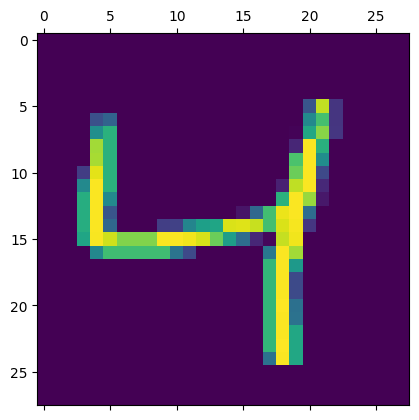

In [7]:
plt.matshow(X_train[2])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4669 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3038 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2731 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2673 - accuracy: 0.9251


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2651 - accuracy: 0.9263


[0.26510897278785706, 0.9262999892234802]

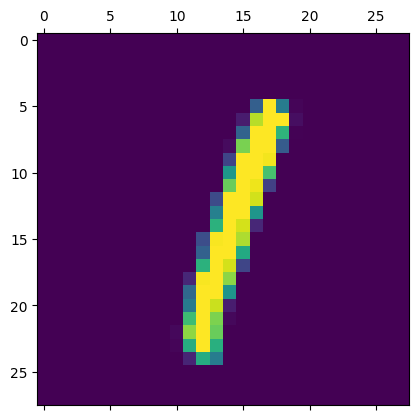

In [16]:
plt.matshow(X_test[5])

In [17]:
y_pred= model.predict(X_test_flattened)
y_pred[5]

313/313 [==============================] - 1s 1ms/step


array([5.7749105e-05, 9.9844265e-01, 4.6165499e-01, 3.5689956e-01,
       6.9933967e-03, 1.7328775e-02, 7.9118200e-03, 6.3993394e-01,
       5.3555346e-01, 1.3114691e-01], dtype=float32)

In [18]:
np.argmax(y_pred[5])

1

In [19]:
y_pred_label=[np.argmax(i)for i in y_pred]

Confusion Matrix

In [20]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    0,    5,    6,    4,    2,    0],
       [   0, 1114,    2,    2,    0,    1,    4,    2,   10,    0],
       [   7,    9,  923,   16,    8,    3,   13,   12,   39,    2],
       [   4,    0,   21,  916,    0,   25,    2,   13,   23,    6],
       [   2,    1,    4,    1,  909,    0,    9,    9,   10,   37],
       [  11,    3,    4,   31,   11,  771,   12,    9,   33,    7],
       [  10,    3,    6,    1,    7,   14,  912,    2,    3,    0],
       [   1,    6,   20,    5,    4,    0,    0,  966,    3,   23],
       [   5,   10,    6,   17,    9,   21,    9,   14,  878,    5],
       [  11,    7,    1,    9,   23,    6,    0,   33,    6,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

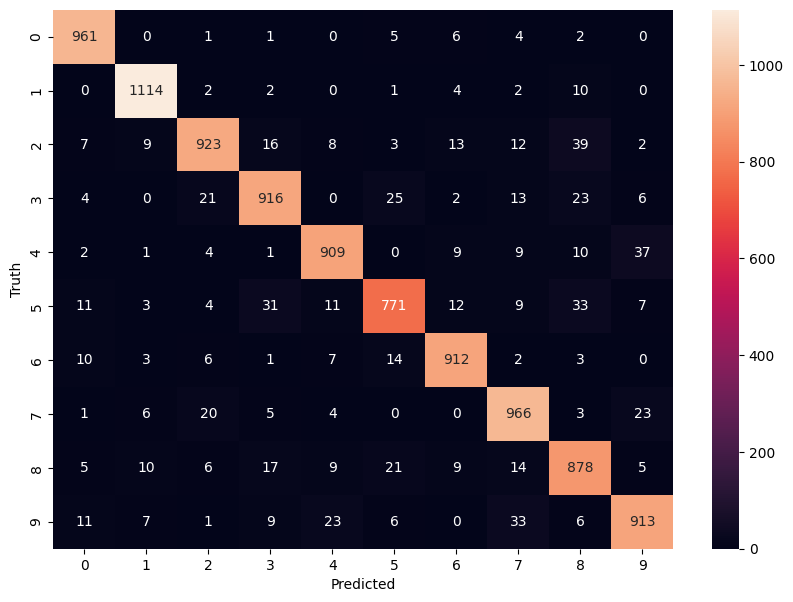

In [21]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

Adding hidden layers

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2749 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1273 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0546 - accuracy: 0.9835
